In [1]:
import numpy as np
import scipy.stats
import scipy.linalg
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import sklearn as sk
import sklearn.gaussian_process as gp
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
class Transaction(object):
    
    N = 10
    n = 2900
    endtime = 0
    
    #Initialize. amount and fees determined using predetermined rates
    def __init__(self,time):
        self.starttime = time
        self.tran_id = 1
        self.sender_id = np.random.randint(0,self.n+1)
        self.receiver_id = np.random.randint(0,self.n+1)
        self.amount = np.random.randint(5,26)
        self.fee = (np.random.randint(1,3)/100)*self.amount
        self.total = self.amount+self.fee
    
    # Print a Transaction
    def __repr__(self):
        send = str(self.fee) 
        return send

In [3]:
import queue

#create an object for blocks, such that in the poisson process there is less to write
class BlockQueue(object):
       
    K = 12
    N = 10
    n = 2900
    MiningRate = 30
    
    # Initialize a Queue
    def __init__(self, MiningRate, K):
        self.MiningRate = MiningRate
        self.waitingentities = [] #priority
        self.NumberinBlock = []
        self.totalfee = []
        self.accounts = np.zeros(self.N)
        self.totalamount = []
        self.time = []
        self.Numblocks = 0
        self.finished = []
        self.K = K
        self.avetime = []
        
    # Print a Queue (just its name and the entire list of waiting Entities)
    def __repr__(self):
        q = " NumWaiting: " + str(len(self.waitingentities)) 
        return q
    
    # A new Entity arrives at this Queue
    def ArriveatQueue(self, newtrans):
        self.waitingentities.append(newtrans)
    
    # Exit queue and move to service
    def pushBlock(self,t):
        self.time.append(t)
        number = np.minimum(len(self.waitingentities),self.K)
        self.NumberinBlock.append(number)
        winner = np.random.randint(0,self.N)
        feesum = 0
        totsum = 0
        tosort = np.array([t.fee for t in self.waitingentities])
        sorting = np.argsort(tosort)[-number:]
        entitiess = np.array(self.waitingentities)[sorting]
        blockdelay = 0
        for i in np.arange(0,number):
            entity = entitiess[i]
            feesum = feesum + entity.fee
            totsum = totsum + entity.amount
            entity.endtime = t
            self.finished.append(entity)
            blockdelay = blockdelay + t - entity.starttime
        self.avetime.append(blockdelay)
        newwaiting = np.delete(np.array(self.waitingentities), sorting)
        self.waitingentities = newwaiting.tolist()
        self.totalfee.append(feesum)
        self.totalamount.append(totsum)
        self.accounts[winner] = self.accounts[winner] + feesum
        self.Numblocks = self.Numblocks + 1

K,mu,lambda:  1 , 30 , 120 , Number of Blocks:  6021
Miner earnings:  [251.9  235.4  243.41 245.26 256.44 227.89 243.39 246.9  246.6  241.9 ]  Average:  243.90899999999982
Average transactions per block:  1.0
Average fees per block:  0.4050971599402093
Average money per block:  20.26440790566351


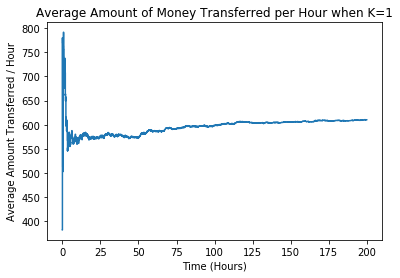

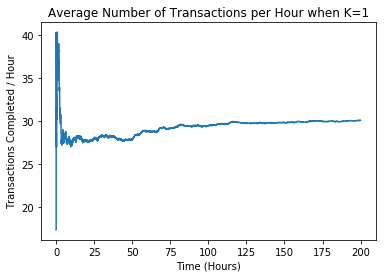

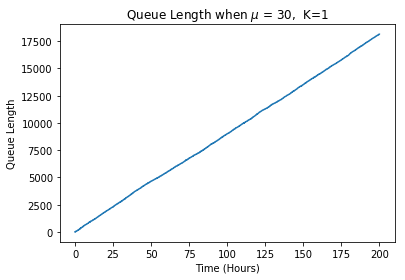

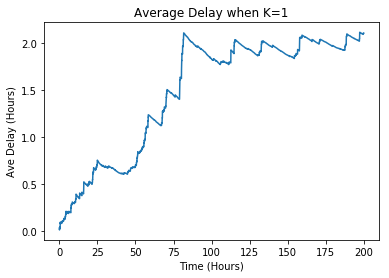

K,mu,lambda:  2 , 30 , 120 , Number of Blocks:  5991
Miner earnings:  [382.36 386.15 373.36 389.13 390.31 391.04 370.2  367.26 400.39 380.02]  Average:  383.02200000000005
Average transactions per block:  1.99966616591554
Average fees per block:  0.6393289934902354
Average money per block:  38.00133533633784


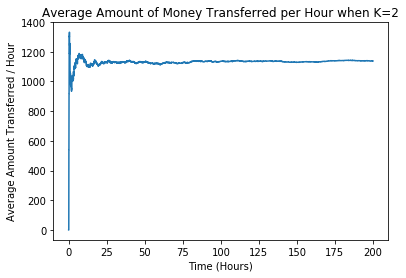

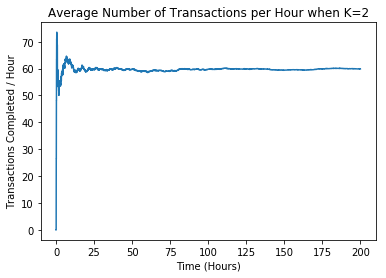

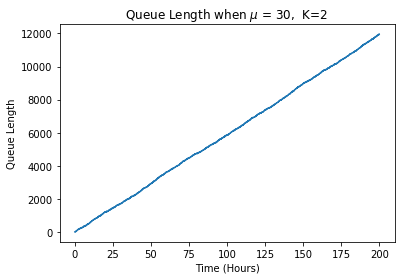

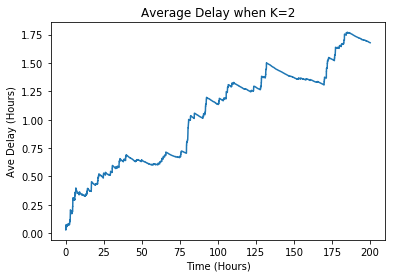

K,mu,lambda:  3 , 30 , 120 , Number of Blocks:  5918
Miner earnings:  [506.24 479.24 467.36 481.09 434.24 496.74 502.47 496.52 492.25 476.46]  Average:  483.26100000000025
Average transactions per block:  2.999324095978371
Average fees per block:  0.8165951334910444
Average money per block:  52.19229469415343


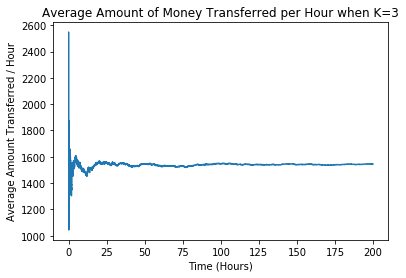

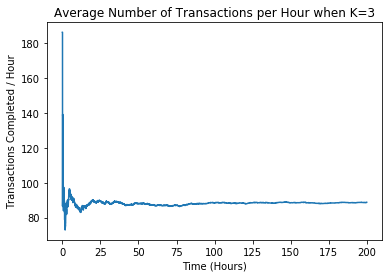

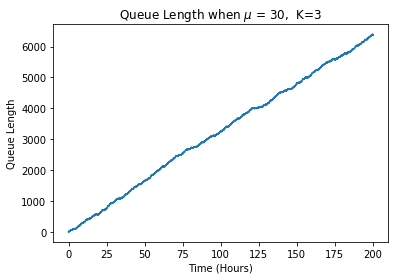

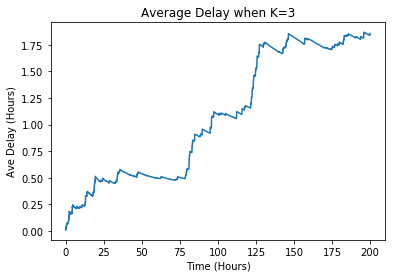

K,mu,lambda:  4 , 30 , 120 , Number of Blocks:  6075
Miner earnings:  [558.14 533.15 542.39 546.21 512.88 538.29 555.3  543.73 509.37 542.44]  Average:  538.1899999999998
Average transactions per block:  3.917037037037037
Average fees per block:  0.8859094650205761
Average money per block:  58.98238683127572


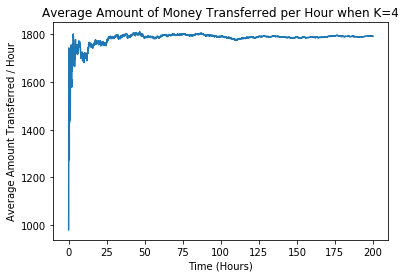

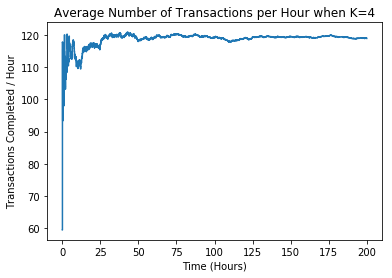

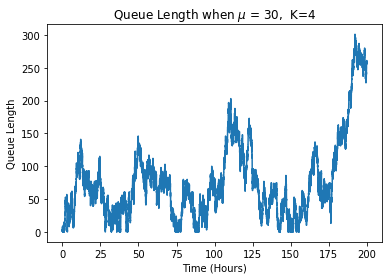

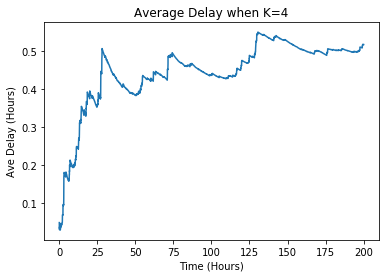

K,mu,lambda:  5 , 30 , 120 , Number of Blocks:  5936
Miner earnings:  [539.34 521.66 515.37 524.55 520.7  588.8  557.01 501.55 564.6  536.87]  Average:  537.0450000000002
Average transactions per block:  4.016677897574124
Average fees per block:  0.9047254043126685
Average money per block:  60.215801886792455


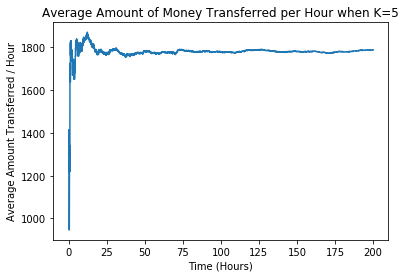

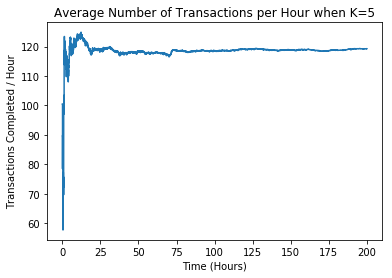

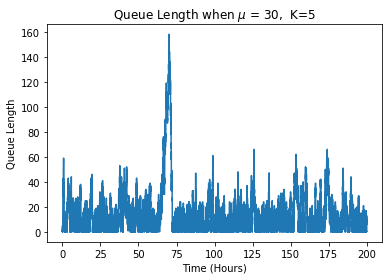

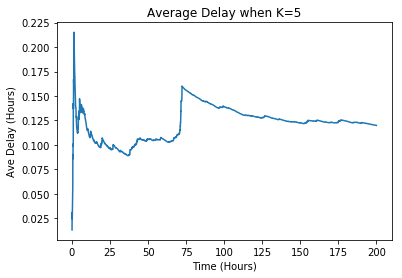

K,mu,lambda:  6 , 30 , 120 , Number of Blocks:  5910
Miner earnings:  [599.97 534.65 517.37 509.63 531.16 558.22 550.47 541.05 522.77 516.31]  Average:  538.1600000000003
Average transactions per block:  4.059390862944163
Average fees per block:  0.9105922165820644
Average money per block:  60.770389170896784


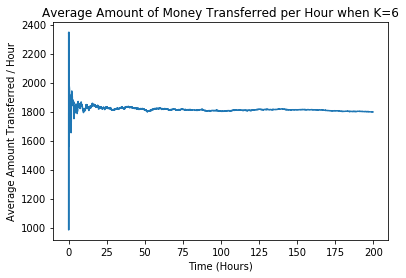

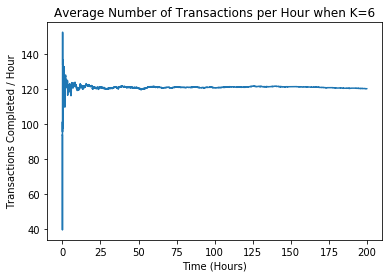

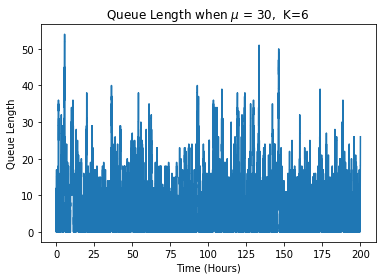

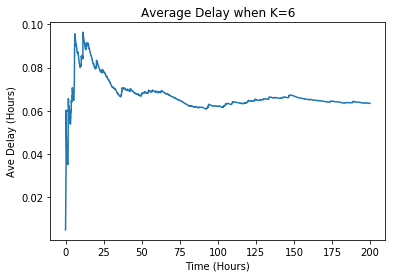

K,mu,lambda:  7 , 30 , 120 , Number of Blocks:  5894
Miner earnings:  [540.46 506.54 561.2  548.87 545.55 570.59 569.21 512.82 524.53 537.73]  Average:  541.7500000000002
Average transactions per block:  4.07278588394978
Average fees per block:  0.919155072955548
Average money per block:  61.34967763827621


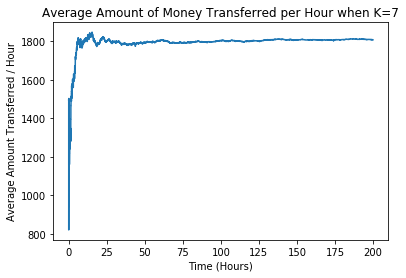

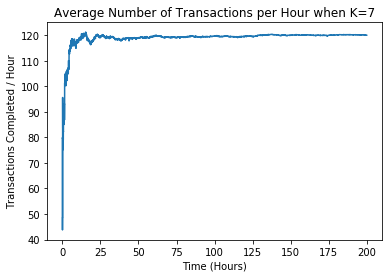

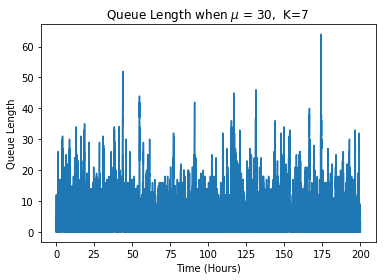

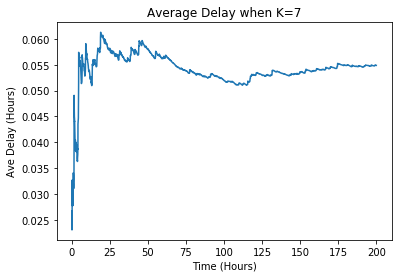

K,mu,lambda:  8 , 30 , 120 , Number of Blocks:  5932
Miner earnings:  [563.79 496.75 540.57 581.1  576.73 493.43 522.76 573.49 538.81 547.2 ]  Average:  543.463
Average transactions per block:  4.047370195549561
Average fees per block:  0.9161547538772759
Average money per block:  60.910991233985165


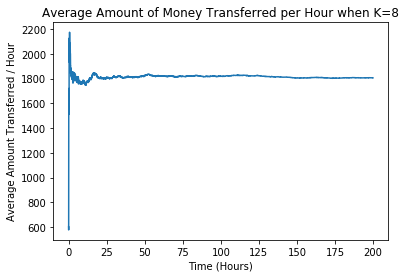

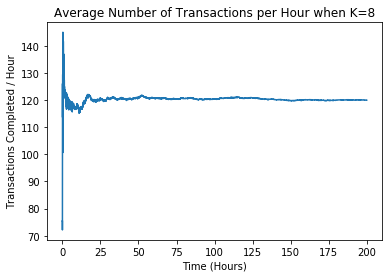

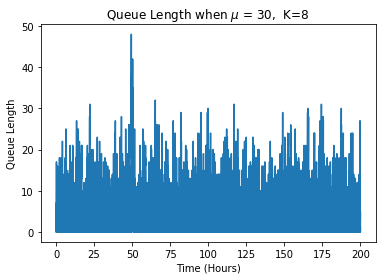

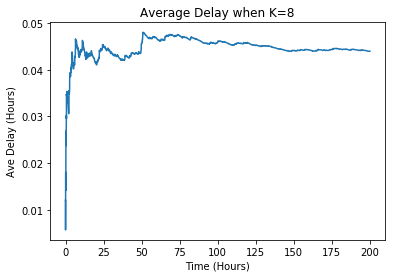

K,mu,lambda:  9 , 30 , 120 , Number of Blocks:  5963
Miner earnings:  [538.41 538.2  557.5  512.33 608.87 572.13 554.55 535.59 560.02 490.89]  Average:  546.8489999999999
Average transactions per block:  4.057521381854771
Average fees per block:  0.9170702666443067
Average money per block:  61.07512996813684


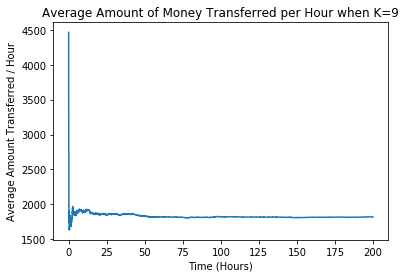

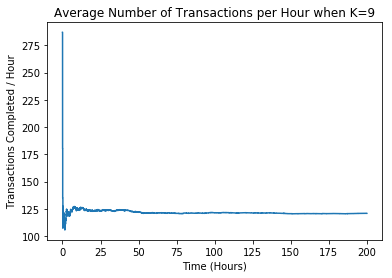

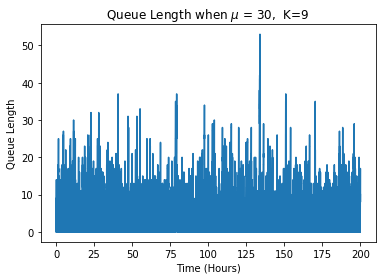

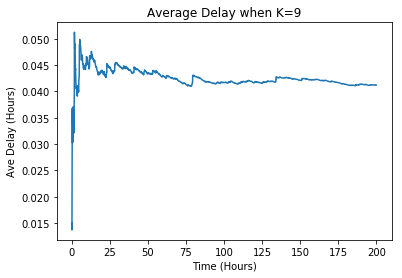

K,mu,lambda:  10 , 30 , 120 , Number of Blocks:  5949
Miner earnings:  [539.24 523.85 561.31 529.67 553.11 527.21 543.45 527.26 504.33 590.37]  Average:  539.9800000000002
Average transactions per block:  4.008068582955119
Average fees per block:  0.9076819633551858
Average money per block:  60.33719952933266


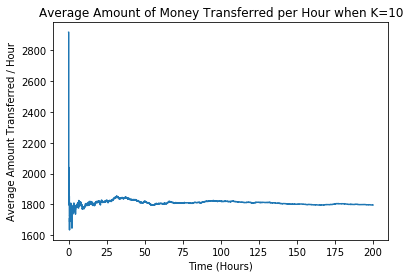

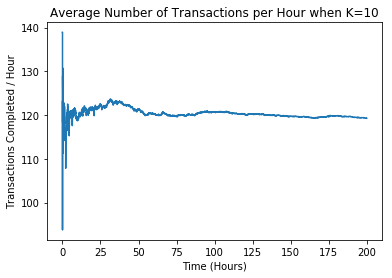

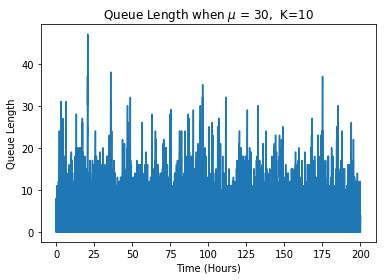

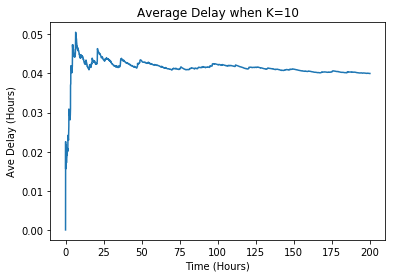

K,mu,lambda:  11 , 30 , 120 , Number of Blocks:  5979
Miner earnings:  [555.87 494.88 512.74 544.17 561.95 553.68 527.62 506.46 595.03 556.32]  Average:  540.872
Average transactions per block:  3.9993309918046496
Average fees per block:  0.9046195015888945
Average money per block:  60.000836260244185


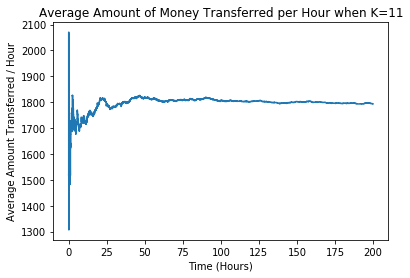

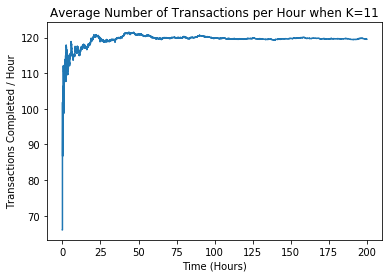

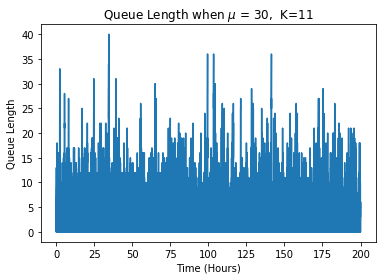

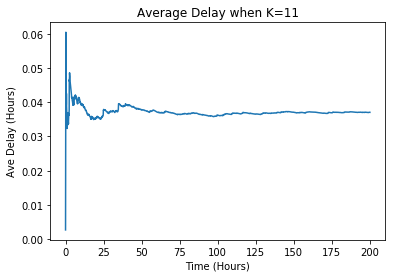

K,mu,lambda:  12 , 30 , 120 , Number of Blocks:  5973
Miner earnings:  [521.41 586.7  571.11 580.74 548.26 541.76 570.8  529.45 496.64 487.6 ]  Average:  543.4469999999999
Average transactions per block:  4.039845973547631
Average fees per block:  0.9098392767453541
Average money per block:  60.668508287292816


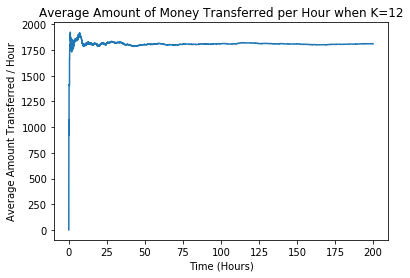

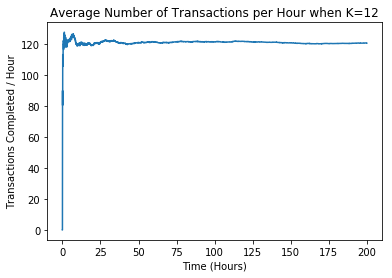

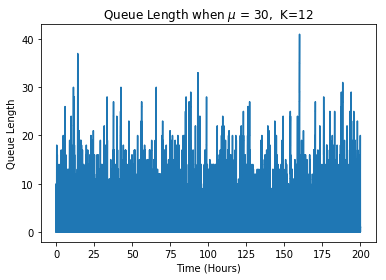

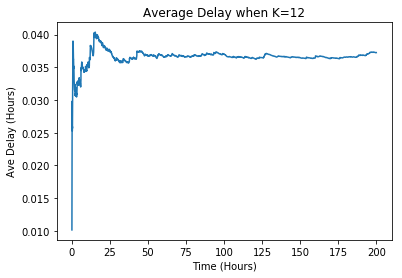

K,mu,lambda:  13 , 30 , 120 , Number of Blocks:  5973
Miner earnings:  [554.69 516.84 611.12 562.   499.03 520.96 518.65 530.42 507.88 532.22]  Average:  535.3810000000003
Average transactions per block:  3.987276075673866
Average fees per block:  0.8963351749539594
Average money per block:  59.72576594676042


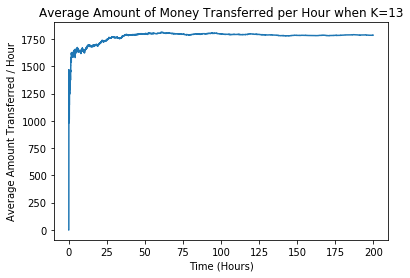

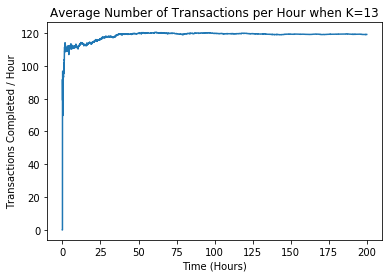

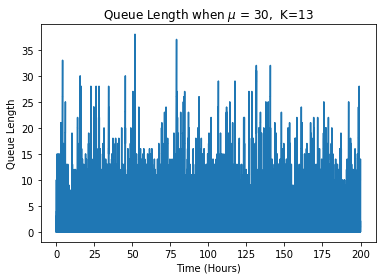

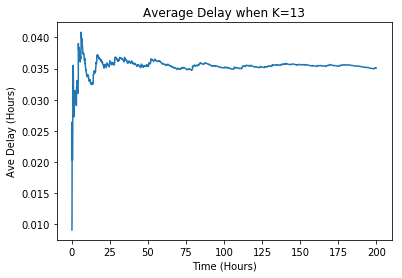

K,mu,lambda:  14 , 30 , 120 , Number of Blocks:  6093
Miner earnings:  [509.78 527.52 557.73 535.66 561.57 590.01 546.37 535.2  552.16 498.52]  Average:  541.452
Average transactions per block:  3.94009519120302
Average fees per block:  0.8886459871984245
Average money per block:  59.121286722468405


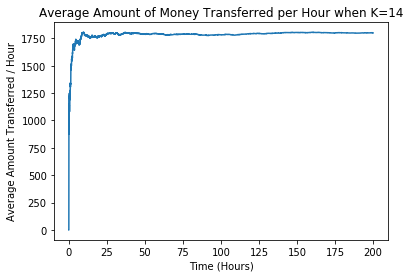

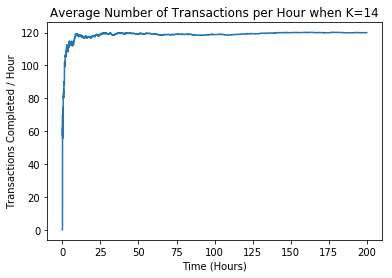

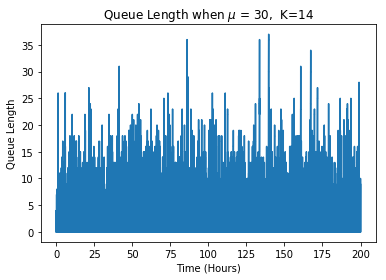

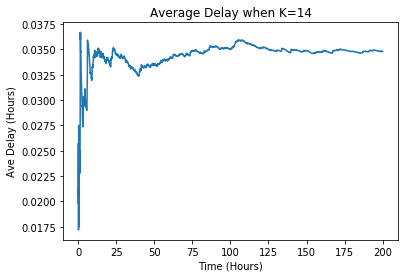

K,mu,lambda:  15 , 30 , 120 , Number of Blocks:  5934
Miner earnings:  [490.69 538.42 548.5  537.55 579.43 518.21 572.72 562.3  568.74 545.09]  Average:  546.1649999999998
Average transactions per block:  4.0965621840242665
Average fees per block:  0.9203993933265925
Average money per block:  61.34260195483653


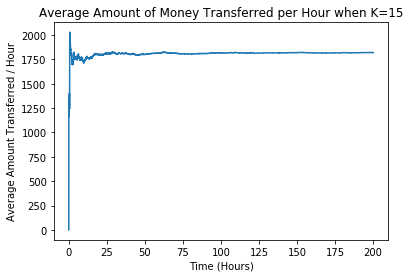

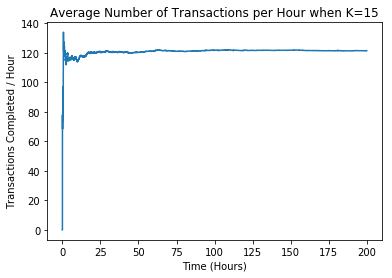

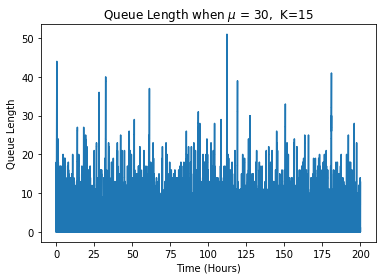

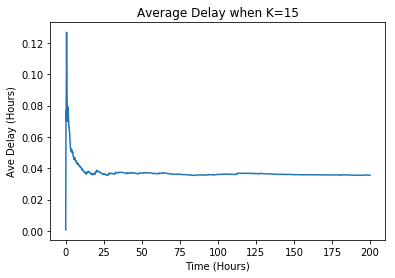

K,mu,lambda:  16 , 30 , 120 , Number of Blocks:  5987
Miner earnings:  [546.72 563.72 564.66 521.08 510.92 552.89 517.14 561.52 570.83 552.4 ]  Average:  546.1879999999999
Average transactions per block:  4.055286453983631
Average fees per block:  0.9122899615834308
Average money per block:  60.95557040253883


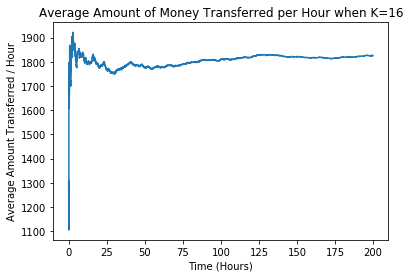

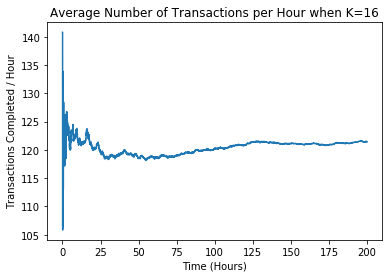

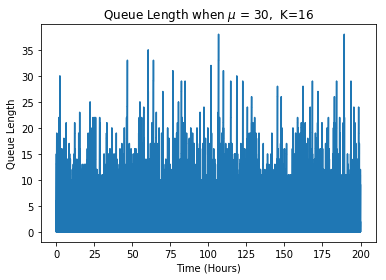

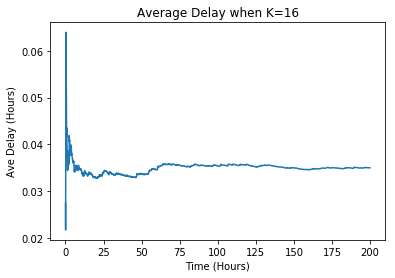

K,mu,lambda:  17 , 30 , 120 , Number of Blocks:  5942
Miner earnings:  [486.08 535.41 590.94 569.94 508.07 520.4  523.73 549.01 519.13 534.87]  Average:  533.758
Average transactions per block:  4.003365870077415
Average fees per block:  0.898280040390441
Average money per block:  59.98401211713228


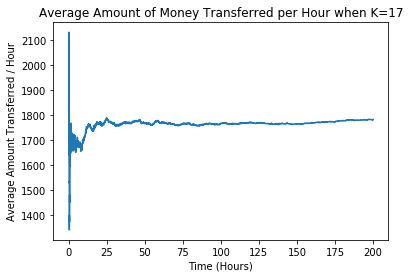

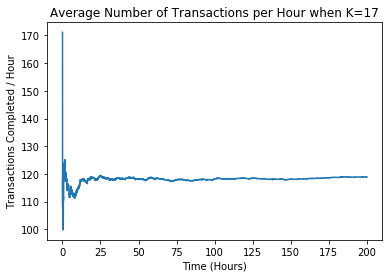

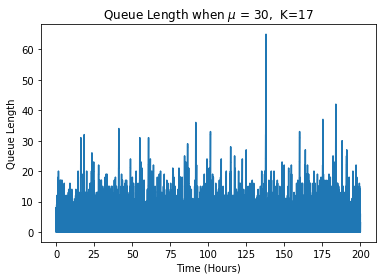

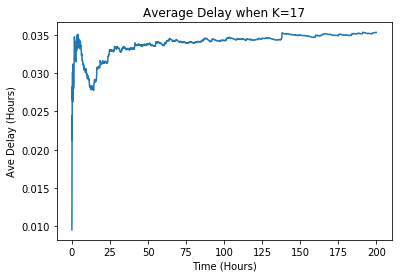

K,mu,lambda:  18 , 30 , 120 , Number of Blocks:  5999
Miner earnings:  [479.75 519.47 524.8  578.73 574.76 509.53 519.63 556.81 531.23 547.21]  Average:  534.1920000000002
Average transactions per block:  3.962993832305384
Average fees per block:  0.8904684114019004
Average money per block:  59.32422070345058


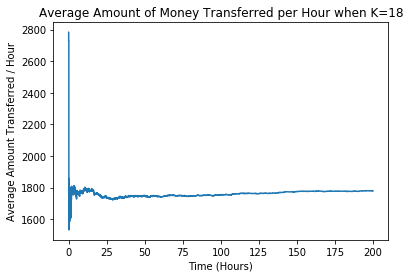

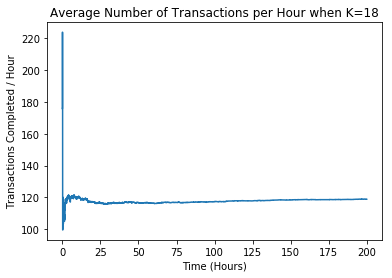

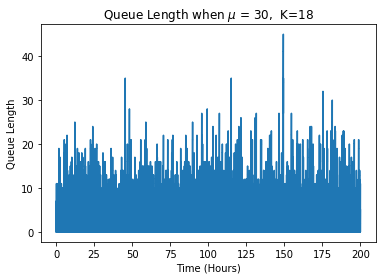

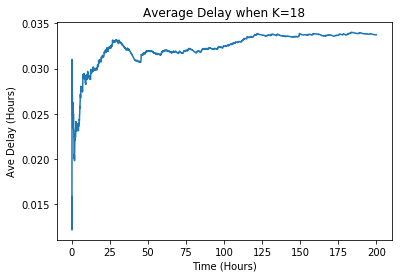

K,mu,lambda:  19 , 30 , 120 , Number of Blocks:  6028
Miner earnings:  [544.55 537.66 519.39 583.7  519.38 524.81 524.09 498.26 561.03 596.49]  Average:  540.9359999999999
Average transactions per block:  3.9837425348374254
Average fees per block:  0.8973722627737226
Average money per block:  59.84737889847379


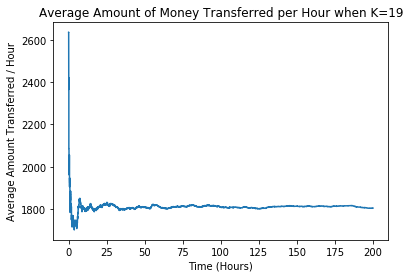

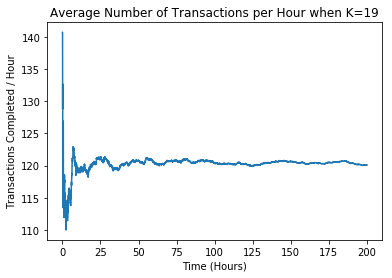

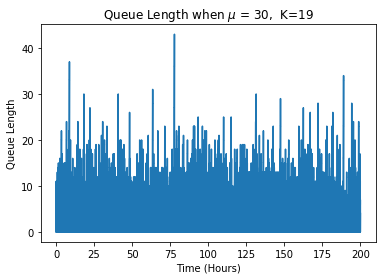

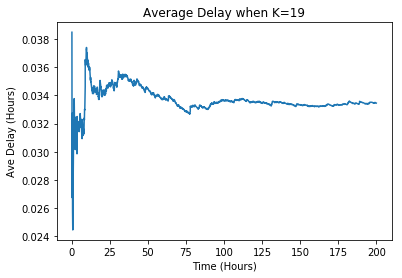

K,mu,lambda:  20 , 30 , 120 , Number of Blocks:  6013
Miner earnings:  [575.96 524.61 476.44 605.38 505.23 448.28 578.56 573.21 569.37 543.7 ]  Average:  540.0740000000002
Average transactions per block:  3.9808747713287875
Average fees per block:  0.8981772825544653
Average money per block:  59.73341094295693


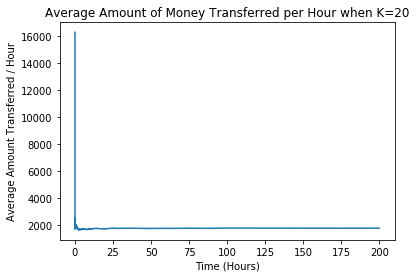

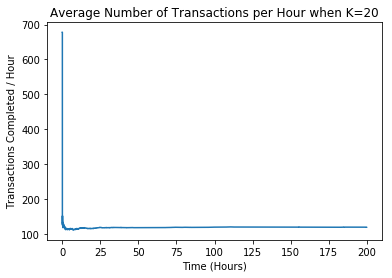

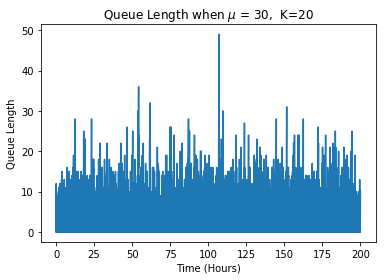

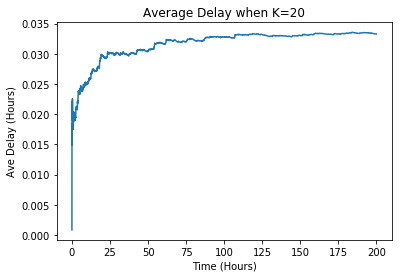

In [12]:
average_amt = []
average_num = []
average_fee = []
average_delay = []
for i in range(1,21,1): #loop K from 1 to 20
    t = 0
    t_end = 200
    trans_rate = 120
    block_rate = 30
    Block = BlockQueue(block_rate,i)
    qsize = []
    times = []
    duration = []
    amountt = []
    
    total_rate = trans_rate + block_rate
    nextEventTime = t + np.random.exponential(1/total_rate)
    while t < t_end:
        t = nextEventTime
        U = np.random.rand()
        if U <=trans_rate/total_rate:
            event = 0 #transaction arrival
        else:
            event = 1 #block push

        if event == 0:
            newArrival = Transaction(t)
            Block.ArriveatQueue(newArrival)

        if event == 1:
            Block.pushBlock(t)
            
        qsize.append(len(Block.waitingentities))

        times.append(t)
        nextEventTime = t + np.random.exponential(1/total_rate)

    for j in np.arange(0,len(Block.finished)):
        duration.append(Block.finished[j].endtime - Block.finished[j].starttime)
        amountt.append(Block.finished[j].fee)

    print("K,mu,lambda: ", i, ",", block_rate,",", trans_rate,",", "Number of Blocks: ", Block.Numblocks)
    print("Miner earnings: ", Block.accounts, " Average: ", np.mean(Block.accounts))
    print("Average transactions per block: ", np.mean(Block.NumberinBlock))
    print("Average fees per block: ", np.mean(Block.totalfee))
    print("Average money per block: ", np.mean(Block.totalamount))

    
    plt.figure()
    cumu = np.cumsum(Block.totalamount)
    ave = cumu/Block.time
    plt.step(Block.time, ave, where='post')
    plt.ylabel("Average Amount Transferred / Hour")
    plt.xlabel("Time (Hours)")
    plt.title("Average Amount of Money Transferred per Hour when K={}".format(i))
    plt.show()
    
    plt.figure()
    bnum = np.cumsum(Block.NumberinBlock)
    avenum = bnum/Block.time
    plt.step(Block.time, avenum, where='post')
    plt.ylabel("Transactions Completed / Hour")
    plt.xlabel("Time (Hours)")
    plt.title("Average Number of Transactions per Hour when K={}".format(i))
    plt.show()
    
    plt.figure()
    plt.step(times, qsize, where='post')
    plt.ylabel("Queue Length")
    plt.xlabel("Time (Hours)")
    plt.title("Queue Length when $\mu$ = 30,  K={}".format(i))
    plt.show()
    
    cumu = np.sum(Block.totalamount)
    ave = cumu/Block.time[-1]
    
    feemu = np.sum(Block.totalfee)
    avef = feemu/Block.time[-1]
    
    bnum = np.sum(Block.NumberinBlock)
    avenum = bnum/Block.time[-1]
    
    femu = np.cumsum(Block.avetime)
    avet = femu/np.cumsum(Block.NumberinBlock)
    plt.plot(Block.time, avet)
    plt.ylabel("Ave Delay (Hours)")
    plt.xlabel("Time (Hours)")
    plt.title("Average Delay when K={}".format(i))
    plt.show()
    
    aved = femu[-1]/np.sum(Block.NumberinBlock)
    
    average_delay.append(aved)
    average_fee.append(avef)
    average_amt.append(ave)
    average_num.append(avenum)

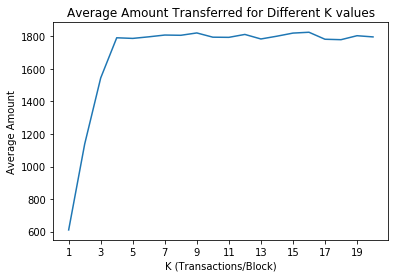

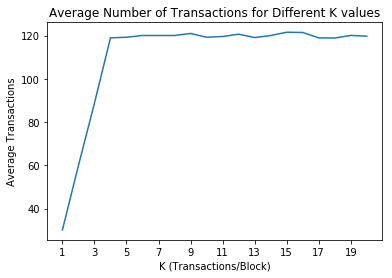

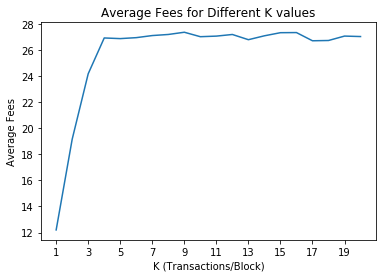

In [13]:
plt.plot(np.arange(1,21), average_amt)
plt.xticks(np.arange(1, 21, 2))
plt.ylabel("Average Amount")
plt.xlabel("K (Transactions/Block)")
plt.title("Average Amount Transferred for Different K values")
plt.show()

plt.plot(np.arange(1,21), average_num)
plt.xticks(np.arange(1, 21, 2))
plt.ylabel("Average Transactions")
plt.xlabel("K (Transactions/Block)")
plt.title("Average Number of Transactions for Different K values")
plt.show()

plt.plot(np.arange(1,21), average_fee)
plt.xticks(np.arange(1, 21, 2))
plt.ylabel("Average Fees")
plt.xlabel("K (Transactions/Block)")
plt.title("Average Fees for Different K values")
plt.show()

In [15]:
average_delay = []
average_amount = []

ave_miner_profit = []

barbazz = pd.DataFrame(columns=['delay(hours)', 'fee amount', "rep"])
for gak in range(1, 21):
    miners = np.zeros(gak)
    t = 0
    t_end = 100
    trans_rate = 120
    block_rate = 30
    i = 12
    Block = BlockQueue(block_rate,i)
    qsize = []
    times = []
    duration = []
    amountt = []
    
    total_rate = trans_rate + block_rate
    nextEventTime = t + np.random.exponential(1/total_rate)
    while t < t_end:
        t = nextEventTime
        U = np.random.rand()
        if U <=trans_rate/total_rate:
            event = 0 #transaction arrival
        else:
            event = 1 #block push

        if event == 0:
            newArrival = Transaction(t)
            Block.ArriveatQueue(newArrival)

        if event == 1:
            Block.pushBlock(t)
            
        qsize.append(len(Block.waitingentities))

        times.append(t)
        nextEventTime = t + np.random.exponential(1/total_rate)

    for j in np.arange(0,len(Block.finished)):
        duration.append(Block.finished[j].endtime - Block.finished[j].starttime)
        amountt.append(Block.finished[j].fee)
        miners[np.random.randint(gak)] += Block.finished[j].fee

    cumu = np.sum(Block.totalamount)
    ave = cumu/Block.time[-1]
    
    feemu = np.sum(Block.totalfee)
    avef = feemu/Block.time[-1]
    
    bnum = np.sum(Block.NumberinBlock)
    avenum = bnum/Block.time[-1]
    
    ave_miner_profit.append(miners)
    
    
    femu = np.cumsum(Block.avetime)
    avet = femu/np.cumsum(Block.NumberinBlock)
    
    aved = femu[-1]/np.sum(Block.NumberinBlock)
    
    zipped = zip(duration, amountt)
    saved = pd.DataFrame(list(sorted(zipped, key=lambda x: x[1])), columns=['delay(hours)', 'fee amount'])
    saved["rep"] = gak
    
    barbazz = pd.concat([barbazz, saved])
    
    average_amount.append(saved["fee amount"].mean())
    average_delay.append(saved["delay(hours)"].mean())
    

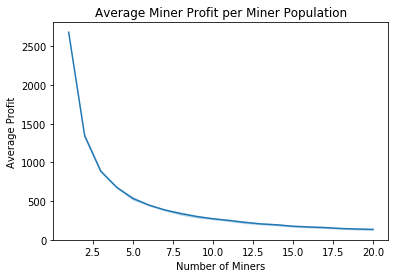

In [7]:
plt.figure()
df = pd.DataFrame(columns=["Num Miners", "Ave Profit"])
for i in range(1, 21):
    a = ave_miner_profit[i-1]
    for j in range(a.shape[0]):
        tmp = pd.DataFrame({'Num Miners': [i], "Ave Profit": [a[j]]})
        df = pd.concat([df, tmp])
sns.lineplot(x="Num Miners", y="Ave Profit", data=df, ci="sd")
plt.title("Average Miner Profit per Miner Population")
plt.xlabel("Number of Miners")
plt.ylabel("Average Profit")
plt.savefig("MinorProfit.png")

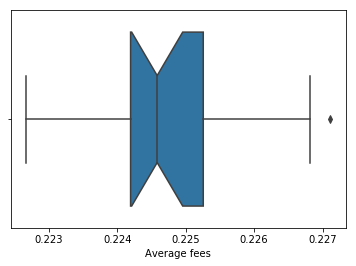

In [16]:
sns.boxplot(average_amount, notch=True)
plt.xlabel("Average fees")
plt.show()

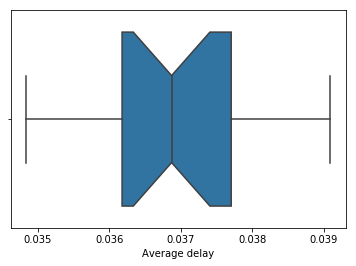

In [17]:
sns.boxplot(average_delay, notch=True)
plt.xlabel("Average delay")
plt.show()

In [ ]:
#this takes a lot of computing power to run. Do not use a mac. 
mod = gp.GaussianProcessRegressor().fit(barbazz["delay(hours)"][:, np.newaxis], barbazz["fee amount"])

In [ ]:
X = np.linspace(0, 0.5, 100)
ymean, ystd = mod.predict(X[:, np.newaxis], return_std=True)
plt.figure()
plt.plot(X, ymean)
plt.fill_between(X, ymean - ystd, ymean + ystd, alpha=0.1)
plt.title("Model Fit for Fee Amount as a function of Delay(Hours)")
plt.ylabel("Recommended Fee Amount")
plt.xlabel("Desired Dealay(hours)")
plt.savefig("TwoRateModel.png")

In [ ]:
mod.predict([[.1], [.2], [.3], [.4], [.5]])